In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.04']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
953,Afghanistan,22.10.04,199690
1918,Africa,22.10.04,12360002
2871,Albania,22.10.04,332337
3824,Algeria,22.10.04,270690
4771,Andorra,22.10.04,46227
...,...,...,...
217503,Wallis and Futuna,22.10.04,761
218491,World,22.10.04,619115458
219399,Yemen,22.10.04,11935
220330,Zambia,22.10.04,333555


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
953,Afghanistan,22.10.04,199690
2871,Albania,22.10.04,332337
3824,Algeria,22.10.04,270690
4771,Andorra,22.10.04,46227
5700,Angola,22.10.04,103131
...,...,...,...
216787,Vietnam,22.10.04,11482334
217503,Wallis and Futuna,22.10.04,761
219399,Yemen,22.10.04,11935
220330,Zambia,22.10.04,333555


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
209554,United States,22.10.04,96481081
91848,India,22.10.04,44601892
70579,France,22.10.04,35635373
28432,Brazil,22.10.04,34684529
75316,Germany,22.10.04,33519761
185860,South Korea,22.10.04,24882894
208567,United Kingdom,22.10.04,23672856
99493,Italy,22.10.04,22602840
101418,Japan,22.10.04,21396066
165239,Russia,22.10.04,20793041


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
202915,Turkey,22.10.04,16873793
187750,Spain,22.10.04,13431098
151193,Oceania,22.10.04,12414458
216787,Vietnam,22.10.04,11482334
12446,Australia,22.10.04,10244727
...,...,...,...
217503,Wallis and Futuna,22.10.04,761
93766,International,22.10.04,721
214866,Vatican,22.10.04,29
204734,Tuvalu,22.10.04,20


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.10.04', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_5000\2990738073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.10.04', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.10.04,96481081
India,22.10.04,44601892
France,22.10.04,35635373
Brazil,22.10.04,34684529
Germany,22.10.04,33519761
South Korea,22.10.04,24882894
United Kingdom,22.10.04,23672856
Italy,22.10.04,22602840
Japan,22.10.04,21396066


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.10.04,96481081
1,India,22.10.04,44601892
2,France,22.10.04,35635373
3,Brazil,22.10.04,34684529
4,Germany,22.10.04,33519761
5,South Korea,22.10.04,24882894
6,United Kingdom,22.10.04,23672856
7,Italy,22.10.04,22602840
8,Japan,22.10.04,21396066
9,Russia,22.10.04,20793041


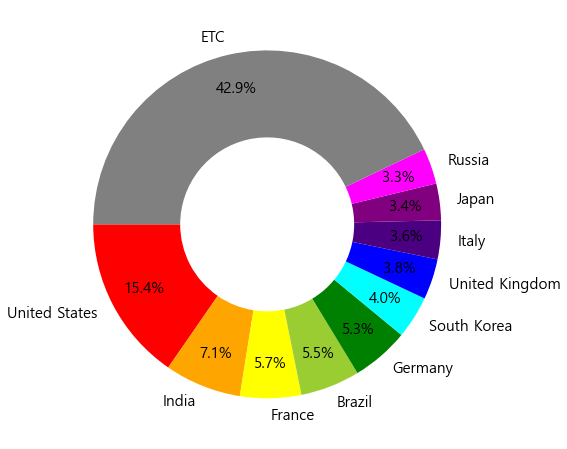

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()